# Pokémon Go! (démonstration Pandas/Seaborn)

Voici un exemple d'utilisation des libraries [Pandas](http://pandas.pydata.org/) (manipulation de données hétérogène) et [Seaborn](http://seaborn.pydata.org/) (visualisations statistiques), sur le [Pokémon dataset](https://www.kaggle.com/abcsds/pokemon) d'Alberto Barradas.

**Références:**

* [Visualizing Pokémon Stats with Seaborn](https://www.kaggle.com/ndrewgele/visualizing-pok-mon-stats-with-seaborn)
* [Pokemon Stats Analysis And Visualizations](https://www.kaggle.com/ash316/pokemon-stats-analysis-and-visualizations)

In [1]:
import pandas as PD
import seaborn as SNS
import matplotlib.pyplot as P

%matplotlib inline

## Lecture et préparation des données

Pandas fournit des méthodes de [lecture des données](http://pandas.pydata.org/pandas-docs/stable/io.html) à partir de nombreux formats, dont les données *Comma Separated Values*:

In [2]:
df = PD.read_csv('./Pokemon.csv', index_col='Name')  # Indexation sur le nom (unique)
df.info()                                            # Informations générales

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 12 columns):
#             800 non-null int64
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(2)
memory usage: 75.8+ KB


Les premières lignes du [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) (tableau 2D) qui en résulte:

In [3]:
df.head(10)  # Les 10 premières lignes

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


Le format est ici simple:

* nom du Pokémon (utilisé comme indice) et son n° (notons que le n° n'est pas unique)
* type primaire et éventuellement secondaire *str*
* différentes caractéristiques *int* (p.ex. points de vie, niveaux d'attage et défense, vitesse, génération)
* type légendaire *bool*

Nous appliquons les filtres suivants directement sur le dataframe (`inplace=True`):

* simplifier le nom des *mega* pokémons
* remplacer les `NaN` de la colonne "`Type 2`"
* éliminer les colonnes "#" et "Sp."

In [4]:
df.set_index(df.index.str.replace(".*(?=Mega)", ''), inplace=True)  # Supprime la chaîne avant Mega
df['Type 2'].fillna('', inplace=True)                               # Remplace NaN par ''
df.drop(['#'] + [ col for col in df.columns if col.startswith('Sp.')], 
        axis=1, inplace=True)   # "Laisse tomber" les colonnes commençant par 'Sp.'
df.head()                       # Les 5 premières lignes

,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Generation,Legendary
Name,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,60,1,False
Venusaur,Grass,Poison,525,80,82,83,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,80,1,False
Charmander,Fire,,309,39,52,43,65,1,False


## Accès aux données

Pandas propose de [multiples façons](http://pandas.pydata.org/pandas-docs/stable/indexing.html) d'accéder aux données d'un DataFrame, ici:

* via le nom (indexé):

In [5]:
df.loc['Bulbasaur', ['Type 1', 'Type 2']]  # Seulement 2 colonnes

Type 1     Grass
Type 2    Poison
Name: Bulbasaur, dtype: object

* par sa position dans la liste:

In [6]:
df.iloc[-5:, :2]  # Les 5 dernières lignes, et les 2 premières colonnes

,Type 1,Type 2
Name,,
Diancie,Rock,Fairy
Mega Diancie,Rock,Fairy
HoopaHoopa Confined,Psychic,Ghost
HoopaHoopa Unbound,Psychic,Dark
Volcanion,Fire,Water


* par une sélection booléenne, p.ex. tous les pokémons légendaires de type herbe:

In [7]:
df[df['Legendary'] & (df['Type 1'] == 'Grass')]

,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Generation,Legendary
Name,,,,,,,,,
ShayminLand Forme,Grass,,600,100,100,100,100,4,True
ShayminSky Forme,Grass,Flying,600,100,103,75,127,4,True
Virizion,Grass,Fighting,580,91,90,72,108,5,True


## Quelques statistiques

In [8]:
df[['Total', 'HP', 'Attack', 'Defense']].describe()  # Description statistique des différentes colonnes

,Total,HP,Attack,Defense
count,800.00000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500
std,119.96304,25.534669,32.457366,31.183501
min,180.00000,1.000000,5.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000
50%,450.00000,65.000000,75.000000,70.000000
75%,515.00000,80.000000,100.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000


In [9]:
df.loc[df['HP'].idxmax()] # Pokémon ayant le plus de points de vie

Type 1        Normal
Type 2              
Total            540
HP               255
Attack            10
Defense           10
Speed             55
Generation         2
Legendary      False
Name: Blissey, dtype: object

In [10]:
df.sort_values('Speed', ascending=False).head(3)  # Les 3 pokémons plus rapides

,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Generation,Legendary
Name,,,,,,,,,
DeoxysSpeed Forme,Psychic,,600,50,95,90,180,3,True
Ninjask,Bug,Flying,456,61,90,45,160,3,False
DeoxysNormal Forme,Psychic,,600,50,150,50,150,3,True


Statistiques selon le statut "légendaire":

In [11]:
legendary = df.groupby('Legendary')
legendary.size()

Legendary
False    735
True      65
dtype: int64

In [12]:
legendary['Total', 'HP', 'Attack', 'Defense', 'Speed'].mean()

,Total,HP,Attack,Defense,Speed
Legendary,,,,,
False,417.213605,67.182313,75.669388,71.559184,65.455782
True,637.384615,92.738462,116.676923,99.661538,100.184615


## Visualisation

Pandas intègre de nombreuses [fonctions de visualisation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) interfacées à [matplotlib](http://matplotlib.org/).

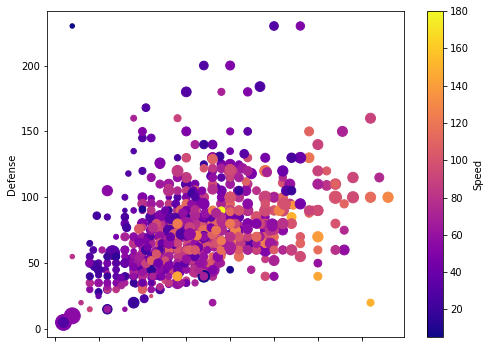

In [13]:
ax = df.plot.scatter(x='Attack', y='Defense', s=df['HP'], c='Speed', cmap='plasma')
ax.figure.set_size_inches((8, 6))

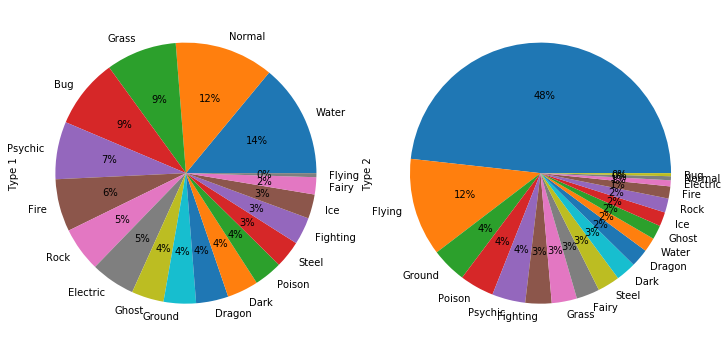

In [14]:
fig, (ax1, ax2) = P.subplots(1, 2, subplot_kw={"aspect": 'equal'}, figsize=(10, 6))

df['Type 1'].value_counts().plot.pie(ax=ax1, autopct='%.0f%%')
df['Type 2'].value_counts().plot.pie(ax=ax2, autopct='%.0f%%')

fig.tight_layout()

Il est également possible d'utiliser la librairie [seaborn](http://seaborn.pydata.org/), qui s'interface naturellement avec Pandas.

In [15]:
pok_type_colors = {    # http://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates
  'Grass': '#78C850',
  'Fire': '#F08030',
  'Water': '#6890F0',
  'Bug': '#A8B820',
  'Normal': '#A8A878',
  'Poison': '#A040A0',
  'Electric': '#F8D030',
  'Ground': '#E0C068',
  'Fairy': '#EE99AC',
  'Fighting': '#C03028',
  'Psychic': '#F85888',
  'Rock': '#B8A038',
  'Ghost': '#705898',
  'Ice': '#98D8D8',
  'Dragon': '#7038F8',
  'Dark': '#705848',
  'Steel': '#B8B8D0',
  'Flying': '#A890F0',
}

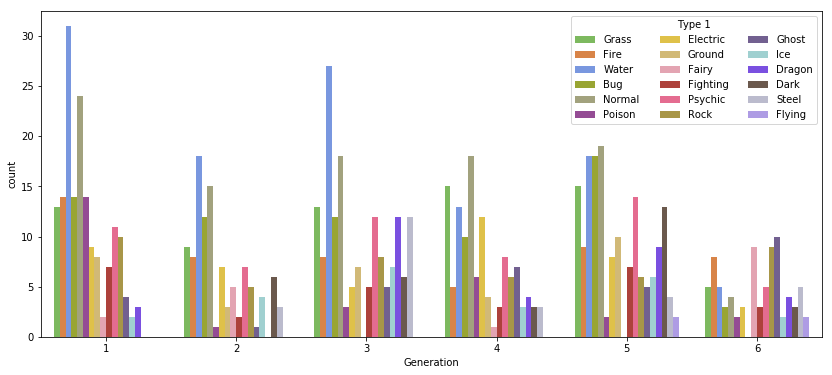

In [16]:
ax = SNS.countplot(x='Generation', hue='Type 1', palette=pok_type_colors, data=df)
ax.figure.set_size_inches((14, 6))
ax.legend(ncol=3, title='Type 1');

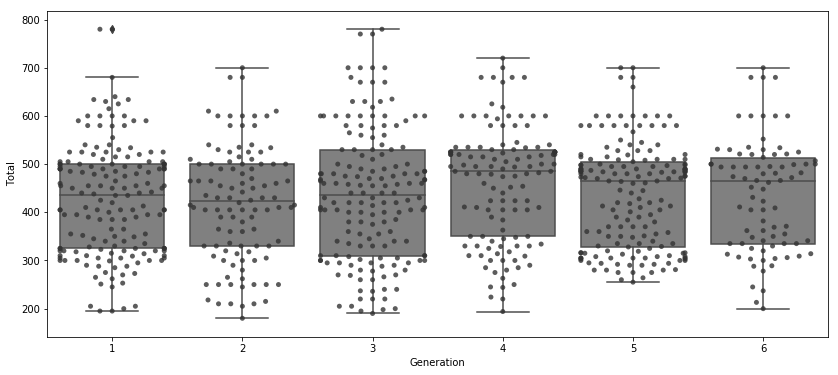

In [17]:
ax = SNS.boxplot(x='Generation', y='Total', data=df, color='0.5');
SNS.swarmplot(x='Generation', y='Total', data=df, color='0.2', alpha=0.8)
ax.figure.set_size_inches((14, 6))

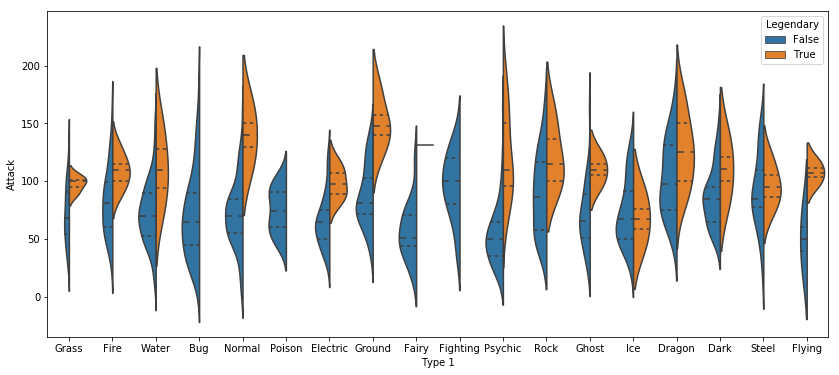

In [18]:
ax = SNS.violinplot(x="Type 1", y="Attack", data=df, hue="Legendary", split=True, inner='quart')
ax.figure.set_size_inches((14, 6))

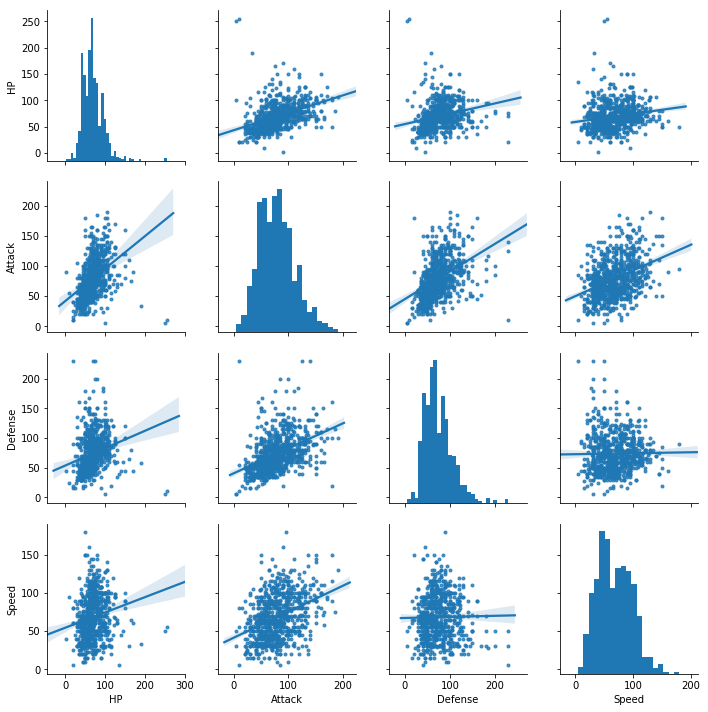

In [19]:
df2 = df.drop(['Total', 'Generation', 'Legendary'], axis=1)
SNS.pairplot(df2, markers='.', kind='reg');

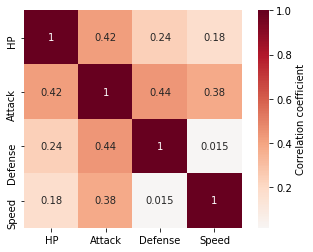

In [20]:
ax = SNS.heatmap(df2.corr(), annot=True, 
                 cmap='RdBu_r', center=0, cbar_kws={'label': 'Correlation coefficient'})
ax.set_aspect('equal')

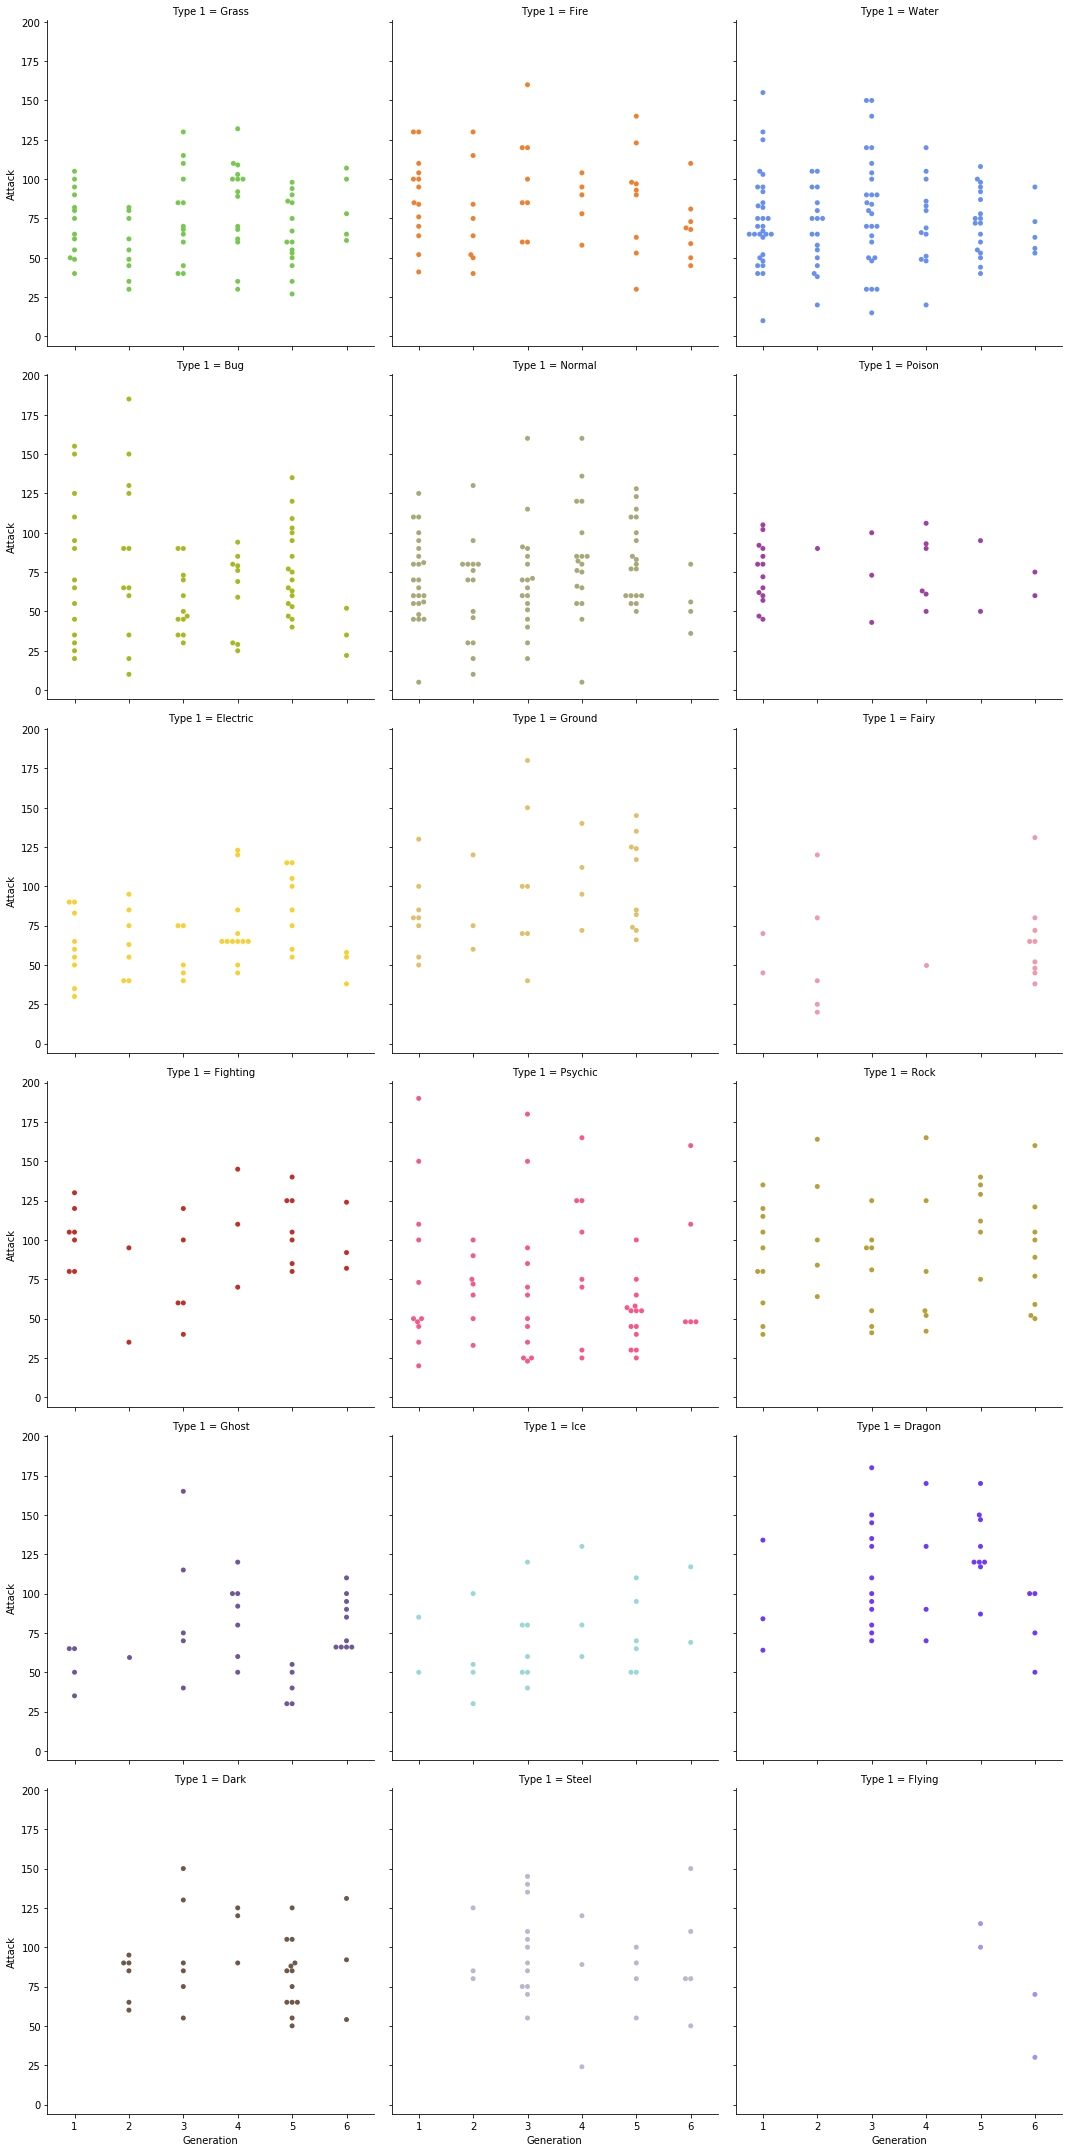

In [21]:
SNS.catplot(x='Generation', y='Attack', data=df, 
               hue='Type 1', palette=pok_type_colors, col='Type 1', col_wrap=3, kind='swarm');